# Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [3]:
df=pd.read_csv('Fish.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.shape

(159, 7)

In [6]:
df.dtypes

,0
Species,object
Weight,float64
Length1,float64
Length2,float64
Length3,float64
Height,float64
Width,float64


# Check for missing values and remove them

In [7]:
df.isnull().sum()

,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(159, 7)

# Scaling the Data
The Standard Scaler is a data preprocessing technique used to normalize features so they have:

Mean = 0

Standard deviation = 1

## Purpose
It’s commonly used in machine learning because many algorithms (like logistic regression, SVM, k-means, and neural networks) perform better when all features are on the same scale.

# Concept
The **StandardScaler** function in scikit-learn is basically a *data normalizer* — its whole job is to take your numeric features and put them on a **standard scale** where:

* **Mean = 0**
* **Standard deviation = 1**

### **Step-by-step what happens inside**

When you run:

```
df_scaled = StandardScaler().fit_transform(df)
```

this is what’s happening under the hood:

1. fit()Learn about your data

Looks at each numeric column.

Figures out the “average” value and how spread out the values are.

Saves these details so they can be used later, even on new data.

2. transform() – Adjust the values

Changes the numbers so that they are centered around zero.

Makes the spread of the numbers the same across all columns.

This ensures no column dominates just because its numbers were originally larger.

3. Output

Gives back the adjusted data, either as a NumPy array or as a DataFrame if you convert it.



In [10]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Species', axis=1))

# Build kmeans model
K-means is a clustering algorithm in machine learning.
It groups data points into a set number of clusters based on their similarity.

## Simple concept
Imagine you have a bunch of dots scattered on a paper.
K-means will:

Decide how many groups (clusters) you want — this number is called K.

Place K points (called centroids) randomly on the paper.

For each dot, check which centroid it’s closest to, and assign it to that group.

Move the centroids to the middle of their assigned dots.

Repeat steps 3–4 until the centroids stop moving much.

At the end, you’ll have K groups of similar points.

## Where it’s used
Customer segmentation (grouping similar customers)

Image compression (grouping similar colors)

Document clustering (grouping similar topics)



In [11]:
kmeans=KMeans(n_clusters=3,random_state=42,init='k-means++')
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [12]:
labels=kmeans.fit_predict(df_scaled)
df_test=df.copy()
df_test['cluster']=labels
df_test['cluster']=df_test['cluster'].astype('category')


### n_clusters=3  
 You want the algorithm to group your data into 3 clusters.

### random_state=42
 This is like setting a “seed” so that every time i run the code, the results are the same. Without this, the random starting points may change every run.

### init='k-means++'
 This is the smart way to choose the initial cluster centers so the algorithm works faster and more accurately than picking them completely randomly.

# Step-by-step explanation:

# kmeans.fit_predict(df_scaled)

Runs the K-Means algorithm on the scaled data.

Groups the data into the clusters we specified earlier (n_clusters=3).

Returns the cluster label (like 0, 1, or 2) for each row, showing which cluster it belongs to.

# df.copy()

Makes a copy of the original DataFrame (df) so that we don’t accidentally change the original data.

This copy is saved in df_test.

# df_test['cluster'] = labels

Adds a new column named "cluster" to the copied DataFrame.

This column stores the cluster number for each data point.

# astype('category')

Converts the cluster column into a categorical type instead of numeric type.

This makes it easier for plotting, grouping, and analysis.

<Axes: xlabel='Length1', ylabel='Length2'>

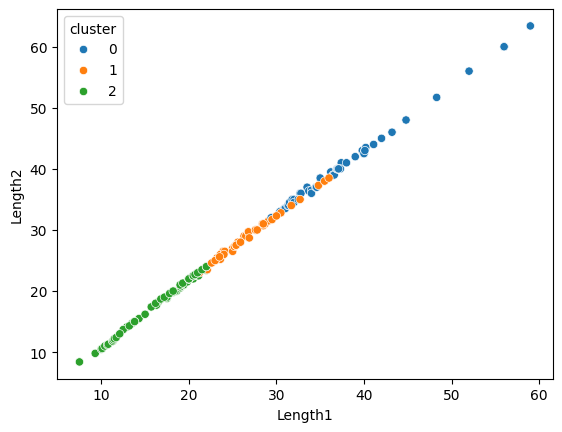

In [13]:
sns.scatterplot(x='Length1',y='Length2',hue='cluster',data=df_test)

# Explanation of output
Each dot represents a data point (one row from your dataset).

The color (blue, orange, green) shows which K-Means cluster that point belongs to.

Since Length1 and Length2 are strongly correlated (almost a straight line), K-Means basically divided them into three groups based on their sizes:

Cluster 0 (blue): The largest length values.

Cluster 1 (orange): Medium length values.

Cluster 2 (green): The smallest length values.

In [14]:
df_test.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,cluster
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1



# Choosing the Optimal Number of Clusters in KMeans (Elbow Method)

When performing KMeans clustering, we must decide the number of clusters (k) to use. If k is too small, different groups may get merged into one cluster. If k is too large, one natural group may be split into many small clusters. To find the most suitable k, we can use the Elbow Method.

# Concept of Distance (Inertia)
When KMeans runs, it:

Places k centroids (points).

Assigns each data point to the nearest centroid.

Measures how far points are from their centroid.

It then sums up all these distances:

Inertia
=
∑
(
distance from point to its centroid
)
2
Inertia=∑(distance from point to its centroid)
2

Small inertia = points are close to their cluster center (good clustering).

Large inertia = points are far from their cluster center (bad clustering).

# Why the Elbow Method Works
When you increase k:

Inertia always decreases (more centroids means shorter distances).

But it doesn’t keep decreasing at the same rate — it starts to “flatten”.

This creates a plot that looks like an arm
The point where the curve bends is the elbow — adding more clusters after this gives little improvement.

# Code Explanation
We loop over different values of k, from 1 to 13. For each k, we fit a KMeans model to the scaled dataset and record its inertia. These values are stored in a list and then plotted. The x-axis represents the number of clusters, and the y-axis represents inertia

In [15]:
df_output=df.copy()

In [16]:
df_output['Cluster']=labels
df_output['Cluster'].value_counts()

,count
Cluster,
2,61
0,51
1,47


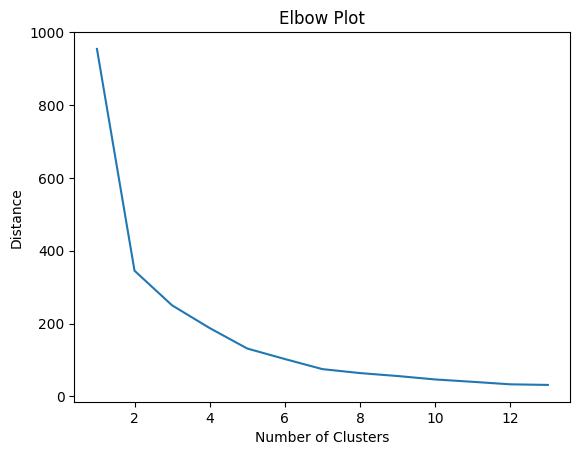

In [17]:
distance_values=[]
for cluster in range(1,14):
  kmeans=KMeans(n_clusters=cluster,random_state=42,init='k-means++')
  kmeans.fit(df_scaled)
  distance_values.append(kmeans.inertia_)

cluster_output=pd.DataFrame({'Cluster':range(1,14),'Distance':distance_values})
plt.plot(cluster_output['Cluster'],cluster_output['Distance'])
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Distance')
plt.show()

# OUTPUT EXPLANATION
Looking at this elbow plot, the sharp drop in distance happens from **k = 1 to k = 3**, and after that the curve starts to flatten.
The bend (elbow) appears around **k = 3** — this would be the optimal number of clusters to choose.



# **Choosing the Optimal Number of Clusters in KMeans (Silhouette Method)**

When performing KMeans clustering, the Silhouette Method can be used to evaluate how well the data points are assigned to clusters. It not only checks how close each point is to the center of its own cluster but also how far it is from the nearest other cluster.

## **Concept of Silhouette Score**
For each point in the dataset:

* **a** = average distance from the point to all other points in the same cluster (measures how tightly the cluster is packed).
* **b** = average distance from the point to all points in the nearest different cluster (measures separation between clusters).
  The silhouette score for that point is calculated as:

```
(b - a) / max(a, b)
```

The score ranges from -1 to 1:

* Close to 1 → point is well matched to its own cluster and far from others.
* Close to 0 → point lies between two clusters.
* Negative → point might be in the wrong cluster.

## **Why the Silhouette Method Works**
Unlike the Elbow Method, which only considers distances inside clusters (inertia), the Silhouette Method balances two things: how compact clusters are and how far apart they are from each other. The best k is the one that maximizes the average silhouette score across all data points.

## **Code Explanation**
The code loops over possible k values from 2 to 13. For each k, it fits a KMeans model to the scaled data and computes the silhouette score for that clustering. The scores are stored and plotted with k on the x-axis and the silhouette score on the y-axis.

## **Reading the Plot**
On the plot, the y-axis shows the average silhouette score for each k. The higher the score, the better the clustering. The optimal k is the one with the highest score. If two k values have similar high scores, the smaller k is usually preferred for simplicity.

## **Difference from Elbow Method**

* **Elbow Method**: Looks at the rate of decrease in total within-cluster distance (inertia).
* **Silhouette Method**: Looks at how well-separated and well-packed the clusters are.




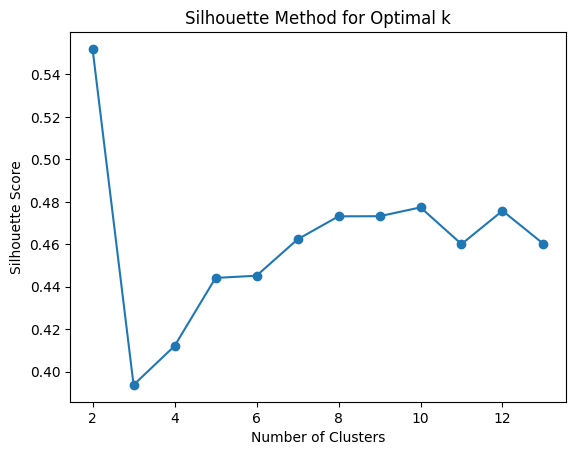

Optimal number of clusters according to Silhouette Method: 2


In [18]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for k in range(2, 14):
    kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)


plt.plot(range(2, 14), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

best_k = range(2, 14)[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters according to Silhouette Method: {best_k}")


# **OUTPUT EXPLANATION**
The highest score is at k = 2, around 0.55.

This means with 2 clusters, the points are most compact and well-separated compared to other k values.

After k = 2, the score drops sharply (k = 3) and then stays lower, with only small changes.

# **Profiling Kmeans Clusters**
Profiling KMeans Clusters means describing and understanding each cluster after you’ve assigned your data points to them.

It’s like saying:

**“We’ve made the groups — now let’s see what makes each group special.”**

Cluster Profile Table (mean values per cluster):
         Weight  Length1  Length2  Length3  Height  Width
cluster                                                  
0        837.71    37.38    40.35    44.19   12.88   6.28
1        327.06    26.63    28.87    32.07    9.65   4.52
2         85.88    16.64    18.09    19.74    5.18   2.78

Cluster Sizes:
cluster
2    61
0    51
1    47
Name: count, dtype: int64


/tmp/ipython-input-2919166239.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_profile = df_test.groupby('cluster')[numeric_cols].mean().round(2)


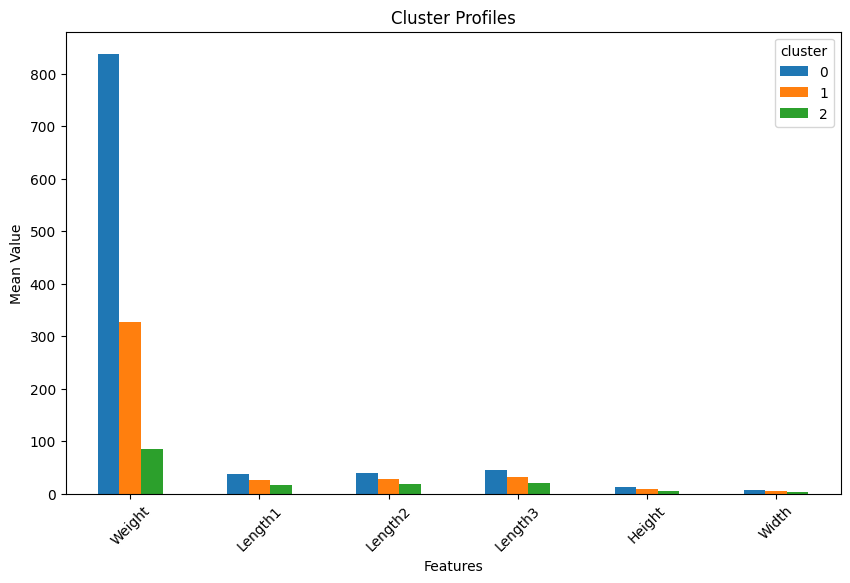

In [19]:
# Keep only numeric columns for profiling
numeric_cols = df_test.select_dtypes(include=np.number).columns

cluster_profile = df_test.groupby('cluster')[numeric_cols].mean().round(2)
print("Cluster Profile Table (mean values per cluster):")
print(cluster_profile)


print("\nCluster Sizes:")
print(df_test['cluster'].value_counts())


cluster_profile.T.plot(kind='bar', figsize=(10, 6))
plt.title("Cluster Profiles")
plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

# OUTPUT EXPLANATION
Cluster 0 contains the largest fish on average — highest weight and measurements.

Cluster 1 contains medium-sized fish.

Cluster 2 contains the smallest fish.

# Apply PCA to the dataset
PCA stands for Principal Component Analysis — it’s a dimensionality reduction technique often used in data science and machine learning.

# How it Works (Step-by-Step)
## Start with your data
You have multiple correlated variables.

## Find patterns in variance
PCA looks for directions in the data where the variation (spread) is largest.
These directions are called principal components.

## Create new axes (components)

The 1st principal component = direction of maximum variance.

The 2nd principal component = direction of maximum variance left, but at a 90° angle to the first.

And so on…

## Transform your data
Your original features are combined into these principal components — each a weighted combination of the original variables.

In [20]:
from sklearn.decomposition import PCA

#APPLY PCA
pca=PCA(n_components=2,random_state=42)
pca_data=pca.fit_transform(df_scaled)

#View Results
pca_df=pd.DataFrame(data=pca_data,columns=['PC1','PC2'])
print(pca_df.head())



        PC1       PC2
0 -0.369223  0.682427
1 -0.052464  0.827850
2  0.093203  0.848837
3  0.378876  0.692796
4  0.626966  0.696093


# Check the explained variance

In [21]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))


Explained variance ratio: [0.87830089 0.08508548]
Total variance captured: 0.9633863747064919


I used PCA to compress my dataset into two main “summary” features (PC1 & PC2) that together still explain over 96% of the original data’s variation. This keeps the patterns but removes redundancy, making the data easier to visualize and analyze

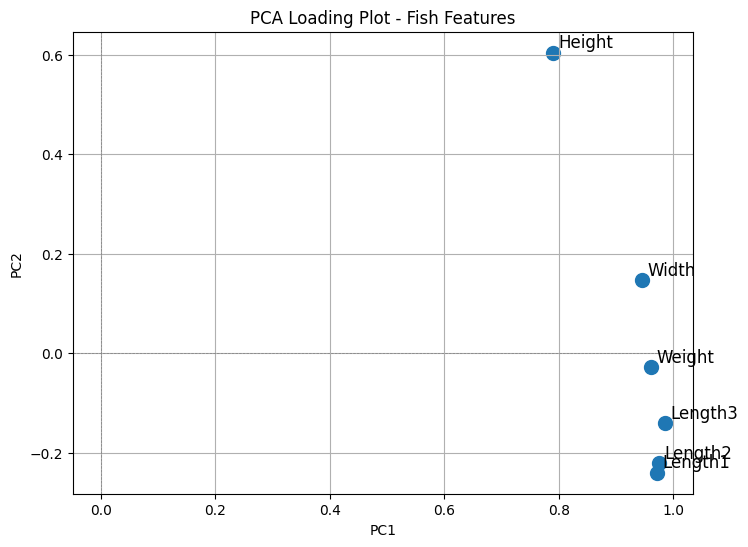

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get loadings (how much each original feature contributes to each PC)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

features = df.select_dtypes(include=np.number).columns  # only numeric features used in PCA
 # use original DataFrame columns

plt.figure(figsize=(8,6))
plt.scatter(loadings[:,0], loadings[:,1], s=100)

# Label each feature
for i, feature in enumerate(features):
    plt.text(loadings[i,0]+0.01, loadings[i,1]+0.01, feature, fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loading Plot - Fish Features')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.show()


# 1. PC1 (x-axis)
All fish features (Weight, Length1, Length2, Length3, Height, Width) are on the far right, close to PC1 = 1.0.

This means PC1 is essentially capturing the overall fish size — bigger fish have higher weight, length, width, and height.

Since all features point in the same direction on PC1, they are strongly positively correlated with each other.

# 2. PC2 (y-axis)
Height is high on PC2 (~0.6), meaning it’s an important differentiator in the second principal component.

Length1, Length2, Length3 are slightly negative on PC2 (~-0.2), so PC2 separates fish by whether they are relatively tall vs. relatively long.

Width is slightly positive, so wider fish lean toward the top of PC2.

# 3. How to interpret PC1 & PC2 together
PC1 explains most of the variance (~87.8% from your earlier result) and is dominated by overall size.

PC2 explains less (~8.5%) and is more about shape differences — taller/wider vs. longer/narrower fish.

Features close together (like Length1, Length2, Length3) vary in sync.


# Choosing the number of Principal Components
PC1 explains ~88% of the variance.

PC2 explains ~8–9% of the variance.

Together, they explain about 96% of the total variance in fish dataset.

# Interpretation:

PC1 alone already captures most of the differences between your fish based on their measurements (Weight, Length, Height, Width).

PC2 adds a small amount of extra variation, possibly separating fish by a secondary pattern that PC1 didn’t capture.

Since the drop after PC1 is huge, this is a clear “elbow point” — meaning most meaningful structure is in PC1, and PC2 is the only other one worth considering.

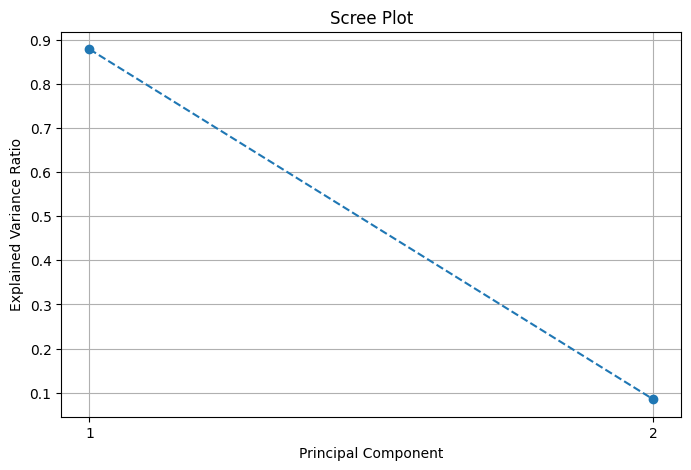

In [23]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         explained_variance_ratio,
         marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

### Elbow point = PC1, because it explains most variance (88%), and adding PC2 only brings it to ~96%.

Adding more would barely change it, so 2 components is plenty.

# **Analysing Principal Components**

In [24]:
loadings_df=pd.DataFrame(pca.components_.T,columns=['PC1','PC2'],index=df.columns[:-1])
print(loadings_df)

              PC1       PC2
Species  0.417321 -0.039633
Weight   0.421535 -0.335106
Length1  0.423419 -0.308638
Length2  0.427658 -0.196821
Length3  0.342727  0.842910
Height   0.410505  0.204058


# Interpretation:

PC1
All features have high positive loadings (~0.34–0.43).
→ PC1 is a size factor — big fish have bigger weight, lengths, and height.

PC2
Length3 is strongly positive (0.8429), while Weight and Length1 have moderate negative loadings.
→ PC2 separates fish more by body proportion than by overall size.

In [25]:
loadings_df.where(abs(loadings_df) >= 0.35)

,PC1,PC2
Species,0.417321,NaN
Weight,0.421535,NaN
Length1,0.423419,NaN
Length2,0.427658,NaN
Length3,NaN,0.84291
Height,0.410505,NaN


PC1: All features except maybe Length3 (just under 0.35).

PC2: Strongly Length3 (+0.84), moderately Weight and Length1 (negative).

# Implementing Factor Analysis on multiple variables

In [30]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

# Check for multicollinearity

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000


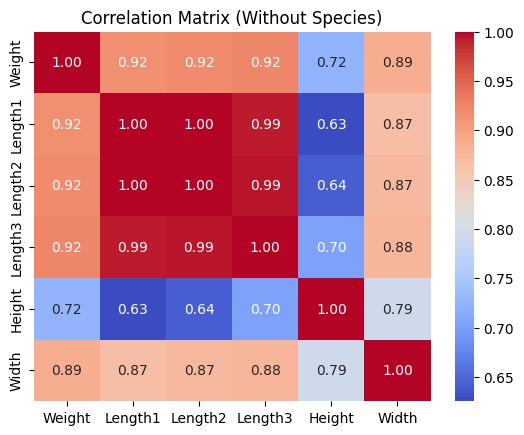

In [36]:
corr_matrix = df.drop('Species', axis=1).corr()

print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Without Species)")
plt.show()


High correlations (>|0.9| and < 1):
           Weight   Length1   Length2   Length3
Weight        NaN  0.915712  0.918618  0.923044
Length1  0.915712       NaN  0.999517  0.992031
Length2  0.918618  0.999517       NaN  0.994103
Length3  0.923044  0.992031  0.994103       NaN


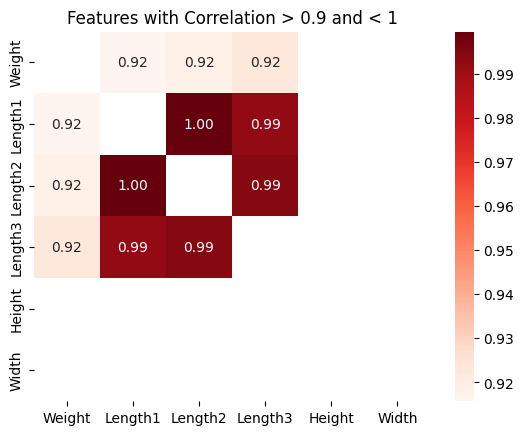

In [38]:
# Apply condition: abs(corr) > 0.9 and < 1
high_corr = corr_matrix[(abs(corr_matrix) > 0.9) & (abs(corr_matrix) < 1)]

print("High correlations (>|0.9| and < 1):")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

sns.heatmap(high_corr, annot=True, cmap='Reds', fmt=".2f", mask=high_corr.isnull())
plt.title("Features with Correlation > 0.9 and < 1")
plt.show()

# 1. Very strong correlations (> 0.9)
These mean the two features almost perfectly increase together.

Length1, Length2, Length3:

0.9995 between Length1 and Length2 — almost identical measurements.

0.9920 between Length1 and Length3.

0.9941 between Length2 and Length3.
This tells us these three length measurements are basically measuring the same underlying dimension of the fish — redundant information.

Weight & Length measurements:

Weight has ~0.92 correlation with each length.
Bigger fish tend to weigh more (unsurprisingly), so weight scales strongly with length.

# 2. Moderately high correlations (0.7–0.89)
Weight & Width → 0.8865: Wider fish weigh more.

Height has weaker correlations (~0.62–0.79), suggesting height varies a bit more independently from length and weight.



# Test the suitability of the dataset



## **KMO = Kaiser–Meyer–Olkin Test**

It’s basically asking:

> “Do my variables share enough patterns to make it worth squeezing them into fewer dimensions?”


### **The idea**

* PCA works best when **variables are correlated** through some **underlying factors**.
* But if your variables are mostly independent, PCA will just produce meaningless components.
* KMO tells you **how much of the variance in your variables is shared variance** vs. unique noise.



### **How it’s calculated (conceptually)**

1. You compute the **correlation matrix** between variables (normal correlations).
2. You compute the **partial correlation matrix** (correlations after removing the effect of all other variables).
3. KMO compares the sum of squared correlations to the sum of squared partial correlations:

$$
\text{KMO} = \frac{\text{sum of squared correlations}}{\text{sum of squared correlations} + \text{sum of squared partial correlations}}
$$

* If partial correlations are small → variables share common variance → **KMO is high**.
* If partial correlations are large → variables are independent → **KMO is low**.



### **Rule of Thumb for Interpretation**

| **KMO Value** | **Interpretation**                                      |
| ------------- | ------------------------------------------------------- |
| 0.90–1.00     | Marvelous (yes, that’s the real term in Kaiser’s paper) |
| 0.80–0.89     | Meritorious                                             |
| 0.70–0.79     | Middling                                                |
| 0.60–0.69     | Mediocre                                                |
| 0.50–0.59     | Miserable                                               |
| < 0.50        | Unacceptable                                            |



### **Why it matters**

* **High KMO**: Your variables have enough shared variance → PCA will likely produce clear, interpretable components.
* **Low KMO**: Your variables are too independent → PCA will just spit out noise.




In [42]:
# Select numeric columns (excluding Species)
fish_numeric = df.drop('Species', axis=1)
# KMO Test
kmo_all, kmo_model = calculate_kmo(fish_numeric)
print("KMO Model:", kmo_model)


KMO Model: 0.7899108316393644


# Interpretation of  results:

KMO (0.7899) → variables share enough common variance to justify PCA or factor analysis.

 fish dataset is statistically well-suited for PCA.



## Apply Factor Analysis to dataset

In [43]:
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(fish_numeric)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [44]:
loadings = pd.DataFrame(fa.loadings_, index=fish_numeric.columns, columns=['Factor1', 'Factor2'])
print("\nFactor Loadings:\n", loadings)



Factor Loadings:
           Factor1   Factor2
Weight   0.758580  0.561676
Length1  0.927032  0.376724
Length2  0.918066  0.396641
Length3  0.871555  0.474937
Height   0.336328  0.842297
Width    0.653963  0.680764



### **1 What loadings mean**

* Each number tells you how **strongly** that variable relates to a factor.
* Closer to **1 or -1** → strong relationship.
* Around **0** → weak or no relationship.



### **Interpreting Factor 1**

* **High loadings** for:

  * Length1 (**0.93**), Length2 (**0.92**), Length3 (**0.87**), Weight (**0.76**), Width (**0.65**).
* This factor seems to represent **overall fish size**, because all length measurements and weight are strongly linked to it.
* Height is low here (**0.34**), so it’s not driving Factor1 much.

### **3️Interpreting Factor 2**

* **High loadings** for:

  * Height (**0.84**), Width (**0.68**), Weight (**0.56**), Length3 (**0.47**).
* This factor seems to represent **body proportions or shape**, especially how tall or broad the fish is relative to its length.



### **4️ Combined meaning**

* **Factor 1 = Size Dimension** → longer & heavier fish score high here.
* **Factor 2 = Shape Dimension** → taller or bulkier fish score high here.


### **Why this matters**

Instead of dealing with **6 separate measurements**, your Factor Analysis shows that most variation can be explained by **just 2 patterns**:

1. **Overall size**
2. **Shape/body proportions**

That’s exactly what dimensionality reduction is for — making the data simpler without losing the main story.




# Determining the number of factor

## Eigenvalues > 1 rule (Kaiser criterion)
Calculate the eigenvalues from your correlation matrix.

Each eigenvalue tells you how much variance a factor explains.

Keep only factors where Eigenvalue > 1 (they explain more variance than an individual variable would).


## Scree plot
Plot the eigenvalues in descending order.

Look for the “elbow” point — where the slope of the curve flattens out.

Keep factors before the elbow.

## Cumulative variance explained
Add up the variance explained by each factor until you reach a target (often 70–80%).



In [47]:
eigen_values, vectors = fa.get_eigenvalues()

for i, val in enumerate(eigen_values, start=1):
    print(f"Factor {i}: Eigenvalue = {val:.3f}")



Factor 1: Eigenvalue = 5.270
Factor 2: Eigenvalue = 0.511
Factor 3: Eigenvalue = 0.120
Factor 4: Eigenvalue = 0.098
Factor 5: Eigenvalue = 0.002
Factor 6: Eigenvalue = 0.000


I have 6 original variables (Weight, Length1, Length2, Length3, Height, Width).

Factor 1 (Eigenvalue 5.270)
→ Explains variance equivalent to ~5.27 of your original variables combined.
That’s huge — remember, each original variable contributes "1" variance by default.

Factor 2 (Eigenvalue 0.511)
→ Explains variance equivalent to only ~0.51 of one variable.

Factor 3 onwards (Eigenvalues < 0.12)
→ Explain almost no extra variance. They’re basically noise.

##  The Kaiser criterion (rule of thumb)
Keep only factors with eigenvalue > 1
→ Means the factor explains more variance than a single variable.

Here:

Factor 1 → Keep (5.27 > 1)

Factor 2 → Drop (0.51 < 1)

Others → Drop (all << 1)

Conclusion:
 dataset’s variance is almost entirely explained by 1 dominant factor.



In [49]:
variance_explained = eigen_values / sum(eigen_values)
cumulative_variance = np.cumsum(variance_explained)

# Step 4: Print table
variance_df = pd.DataFrame({
    'Factor': np.arange(1, len(eigen_values)+1),
    'Eigenvalue': eigen_values,
    'Variance_Explained': variance_explained,
    'Cumulative_Variance': cumulative_variance
})
print(variance_df)

   Factor  Eigenvalue  Variance_Explained  Cumulative_Variance
0       1    5.269805            0.878301             0.878301
1       2    0.510513            0.085085             0.963386
2       3    0.120303            0.020050             0.983437
3       4    0.097527            0.016255             0.999691
4       5    0.001575            0.000262             0.999954
5       6    0.000278            0.000046             1.000000


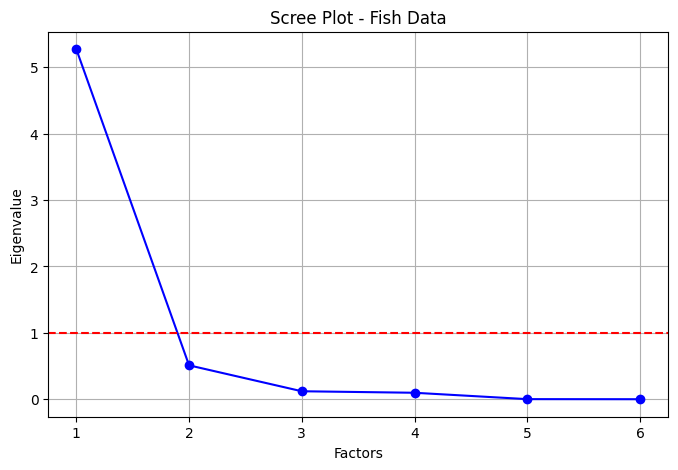

In [50]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigen_values) + 1), eigen_values, 'o-', color='b')
plt.title('Scree Plot - Fish Data')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')  # Kaiser criterion line
plt.grid(True)
plt.show()



### **What the plot shows**

1. **X-axis (Factors)** → Factor 1 through Factor 6 (since i have 6 numeric variables).
2. **Y-axis (Eigenvalue)** → The amount of variance each factor explains.
3. **Blue line** → How eigenvalues drop as we move from the most important factor to the least important.
4. **Red dashed line at 1** → **Kaiser’s criterion** threshold — only factors above this line are considered meaningful.



### **Interpretation**

* **Factor 1** has an eigenvalue > 5 → explains the **majority** of variance (87.83%).
* **Factor 2** has eigenvalue ≈ 0.5 → well below 1, so it’s weak according to Kaiser’s rule.
* Factors 3–6 have eigenvalues very close to 0 → negligible contribution.
* The **sharp bend (“elbow”)** after Factor 1 means additional factors don’t add much explanatory power. This is  **elbow point**.


### **Conclusion**

* **One dominant factor** is enough to represent most of the variability in your fish dataset.
* That factor is likely “overall fish size” since all length/weight measures are highly correlated.



#	Communalities
How to interpret
Close to 1 → The variable is almost entirely explained by the extracted factors.

Close to 0 → The variable is barely explained by the factors (has mostly unique variance).

All variables have very high communalities (>0.8), which means your two-factor model is capturing the structure of your fish dataset very well.

The fact that Length1 and Length2 are at ~1 suggests they are almost perfectly predictable from the extracted factors — consistent with the high correlations you saw earlier.

In [52]:
pd.DataFrame(fa.get_communalities(), index=fish_numeric.columns, columns=['Communalities'])

,Communalities
Weight,0.890924
Length1,1.001310
Length2,1.000169
Length3,0.985172
Height,0.822580
Width,0.891107
